In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
%matplotlib inline

In [3]:
from lightgbm import LGBMClassifier

In [4]:
subject = pd.read_csv('D:\데이터학술제\Dataset (1)\Subject_D.csv')
test = pd.read_csv('D:\데이터학술제\Dataset (1)\Subject_D_testset.csv')

In [5]:
subject.head()

,Class,AF3 delta std,AF3 delta m,AF3 theta std,AF3 theta m,AF3 alpha std,AF3 alpha m,AF3 beta std,AF3 beta m,F7 delta std,...,F8 beta std,F8 beta m,AF4 delta std,AF4 delta m,AF4 theta std,AF4 theta m,AF4 alpha std,AF4 alpha m,AF4 beta std,AF4 beta m
0,1,3566.375438,2062.665095,1.040973,2.574824,1.376404,1.657806,0.933377,2.429998,3564.653552,...,0.991871,1.800747,3564.807696,2061.398768,1.839022,2.917284,1.095649,1.342387,1.141837,1.820216
1,1,3565.986713,2061.826341,1.347088,2.154989,0.904145,2.603965,1.175508,2.292886,3564.071577,...,0.852802,1.620589,3565.004893,2061.989687,1.314281,2.876174,1.178849,1.939520,0.903631,2.145510
2,1,3566.977885,2062.639807,1.083747,2.186981,1.155864,2.293261,1.144330,2.107225,3564.207493,...,1.075723,1.422287,3567.117563,2061.465328,1.628649,2.286765,1.591144,1.949241,1.006042,2.228659
3,1,3566.342634,2063.069909,1.208843,2.160716,1.143995,2.283394,1.008707,2.047132,3564.536023,...,0.696173,1.416980,3565.482402,2060.885464,1.049679,2.486281,0.684482,2.173874,0.937085,2.165614
4,1,3567.798629,2062.549327,1.378424,3.255706,0.795261,1.726990,0.914162,1.746653,3565.157175,...,0.743514,1.384104,3566.585859,2061.257282,1.500156,3.115490,1.235855,2.453826,0.840093,2.126146


In [6]:
test.head()

,AF3 delta std,AF3 delta m,AF3 theta std,AF3 theta m,AF3 alpha std,AF3 alpha m,AF3 beta std,AF3 beta m,F7 delta std,F7 delta m,...,F8 beta std,F8 beta m,AF4 delta std,AF4 delta m,AF4 theta std,AF4 theta m,AF4 alpha std,AF4 alpha m,AF4 beta std,AF4 beta m
0,3571.132074,2063.226751,0.257267,1.527995,1.372278,1.887114,1.284385,1.969588,3563.848429,2059.582343,...,0.752036,1.933027,3567.172213,2062.192566,0.645611,2.738938,0.854316,2.126324,1.051305,1.956085
1,3571.221735,2063.585495,0.314984,1.143122,0.354754,2.047427,1.140930,2.048862,3563.760177,2059.962074,...,0.923015,1.848965,3567.675066,2062.798366,0.594246,2.636679,1.405469,2.005621,0.915126,2.013492
2,3570.901856,2063.469245,0.616505,1.495963,0.353110,1.863177,1.261060,1.954234,3563.873846,2060.047481,...,0.937406,1.706563,3566.008884,2061.606459,1.791973,2.558481,1.104614,1.419661,1.206172,1.954292
3,3571.193635,2064.239034,0.850664,1.574118,0.475621,2.167718,1.400486,1.913044,3563.658311,2059.972214,...,0.712391,1.735385,3566.969082,2061.984654,1.509754,2.501633,0.881439,1.710077,1.243985,2.142467
4,3571.566352,2063.991771,0.435727,1.932264,0.426083,1.461616,1.585798,2.219166,3563.426994,2058.825317,...,0.911967,1.688752,3568.059218,2061.971563,0.969511,3.240492,0.525513,1.290403,1.218280,2.218954


In [8]:
subject.shape

(2400, 113)

In [9]:
test.shape

(480, 112)

In [10]:
subject.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Columns: 113 entries, Class to AF4 beta m
dtypes: float64(112), int64(1)
memory usage: 2.1 MB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Columns: 112 entries, AF3 delta std to AF4 beta m
dtypes: float64(112)
memory usage: 420.1 KB


In [19]:
subject.isna().any()

Class            False
AF3 delta std    False
AF3 delta m      False
AF3 theta std    False
AF3 theta m      False
                 ...  
AF4 theta m      False
AF4 alpha std    False
AF4 alpha m      False
AF4 beta std     False
AF4 beta m       False
Length: 113, dtype: bool

In [20]:
test.isna().any()

AF3 delta std    False
AF3 delta m      False
AF3 theta std    False
AF3 theta m      False
AF3 alpha std    False
                 ...  
AF4 theta m      False
AF4 alpha std    False
AF4 alpha m      False
AF4 beta std     False
AF4 beta m       False
Length: 112, dtype: bool

In [23]:
subject.isnull().sum()

Class            0
AF3 delta std    0
AF3 delta m      0
AF3 theta std    0
AF3 theta m      0
                ..
AF4 theta m      0
AF4 alpha std    0
AF4 alpha m      0
AF4 beta std     0
AF4 beta m       0
Length: 113, dtype: int64

In [24]:
test.isnull().sum()

AF3 delta std    0
AF3 delta m      0
AF3 theta std    0
AF3 theta m      0
AF3 alpha std    0
                ..
AF4 theta m      0
AF4 alpha std    0
AF4 alpha m      0
AF4 beta std     0
AF4 beta m       0
Length: 112, dtype: int64

In [12]:
subject.describe()

,Class,AF3 delta std,AF3 delta m,AF3 theta std,AF3 theta m,AF3 alpha std,AF3 alpha m,AF3 beta std,AF3 beta m,F7 delta std,...,F8 beta std,F8 beta m,AF4 delta std,AF4 delta m,AF4 theta std,AF4 theta m,AF4 alpha std,AF4 alpha m,AF4 beta std,AF4 beta m
count,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,...,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000
mean,1.000000,3569.401214,2064.227636,1.123674,2.710240,0.986722,2.355167,1.214557,2.313954,3564.022552,...,1.140139,2.127922,3567.945628,2062.848106,1.121490,2.685636,1.021287,2.415627,1.142112,2.202591
std,0.816667,14.993058,9.125554,0.964546,2.091801,0.582299,1.087929,0.298354,0.417150,1.803736,...,0.258746,0.334790,2.991484,3.359469,0.898343,1.863118,0.481576,0.817168,0.228623,0.292325
min,0.000000,3370.595863,1978.862421,0.079668,0.554753,0.074695,0.604197,0.526885,1.355452,3555.254510,...,0.341933,0.934593,3524.828498,2056.803031,0.087294,0.740845,0.073519,0.633118,0.465208,1.385154
25%,0.000000,3567.582698,2062.175286,0.676555,1.941371,0.632579,1.785322,1.018583,2.078357,3563.004004,...,0.957539,1.898371,3566.539262,2061.596779,0.703275,1.998111,0.688569,1.895351,0.985536,1.997780
50%,1.000000,3569.053257,2063.104099,0.967423,2.364487,0.909166,2.216893,1.175678,2.283029,3563.814294,...,1.112818,2.114355,3567.988963,2062.496321,0.993279,2.460111,0.952982,2.323642,1.129903,2.196627
75%,2.000000,3570.836632,2064.113227,1.293301,2.820929,1.223918,2.705716,1.370632,2.486424,3564.847129,...,1.286271,2.317837,3569.553255,2063.400339,1.342033,2.926844,1.281393,2.839025,1.282586,2.387454
max,2.000000,3725.451803,2189.586102,15.206517,30.192580,9.030337,22.057474,3.811670,7.237756,3588.176094,...,3.051414,4.638839,3609.702796,2123.342683,18.237179,28.610012,5.342381,13.372382,2.362765,4.580891


In [26]:
subject.corr()

,Class,AF3 delta std,AF3 delta m,AF3 theta std,AF3 theta m,AF3 alpha std,AF3 alpha m,AF3 beta std,AF3 beta m,F7 delta std,...,F8 beta std,F8 beta m,AF4 delta std,AF4 delta m,AF4 theta std,AF4 theta m,AF4 alpha std,AF4 alpha m,AF4 beta std,AF4 beta m
Class,1.000000,0.006261,-0.080918,-0.097358,-0.112827,-0.028429,-0.049064,-0.111922,-0.062443,-0.077811,...,-0.059618,0.105510,-0.025202,-0.062670,-0.015728,-0.019465,0.002942,0.013179,-0.014817,0.002340
AF3 delta std,0.006261,1.000000,0.759539,-0.156958,-0.218762,-0.188406,-0.247191,-0.093098,-0.170892,0.076242,...,0.088785,0.001253,0.158599,0.023639,-0.008105,-0.028118,-0.058705,-0.082195,-0.047610,-0.011914
AF3 delta m,-0.080918,0.759539,1.000000,0.360257,0.369964,0.211996,0.255961,0.194792,0.286258,0.226600,...,0.149770,0.145158,0.074648,0.299218,0.212621,0.230756,0.060683,0.053883,0.034806,0.090058
AF3 theta std,-0.097358,-0.156958,0.360257,1.000000,0.801747,0.459187,0.532038,0.279810,0.448243,0.223562,...,0.124878,0.277687,-0.133894,0.572244,0.603379,0.601636,0.235368,0.320833,0.141485,0.208965
AF3 theta m,-0.112827,-0.218762,0.369964,0.801747,1.000000,0.506383,0.697344,0.367090,0.572624,0.271843,...,0.134543,0.301497,-0.126270,0.560349,0.518959,0.626888,0.260434,0.336734,0.157268,0.205995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AF4 theta m,-0.019465,-0.028118,0.230756,0.601636,0.626888,0.203780,0.276041,0.053398,0.147347,0.234500,...,0.181730,0.361514,-0.254845,0.778219,0.795925,1.000000,0.372819,0.513696,0.148227,0.242037
AF4 alpha std,0.002942,-0.058705,0.060683,0.235368,0.260434,0.204988,0.223869,-0.042619,0.050605,0.116090,...,0.018056,0.170697,-0.179543,0.290809,0.282220,0.372819,1.000000,0.543243,0.003313,0.113619
AF4 alpha m,0.013179,-0.082195,0.053883,0.320833,0.336734,0.230888,0.296889,-0.048349,0.058280,0.123918,...,0.020513,0.208870,-0.235225,0.420317,0.413855,0.513696,0.543243,1.000000,0.022165,0.134780
AF4 beta std,-0.014817,-0.047610,0.034806,0.141485,0.157268,0.068862,0.075213,0.281116,0.214300,0.038643,...,0.178765,0.155676,0.123372,0.269773,0.115948,0.148227,0.003313,0.022165,1.000000,0.459022


In [13]:
subject.tail()

,Class,AF3 delta std,AF3 delta m,AF3 theta std,AF3 theta m,AF3 alpha std,AF3 alpha m,AF3 beta std,AF3 beta m,F7 delta std,...,F8 beta std,F8 beta m,AF4 delta std,AF4 delta m,AF4 theta std,AF4 theta m,AF4 alpha std,AF4 alpha m,AF4 beta std,AF4 beta m
2395,0,3572.039773,2063.907536,0.673535,1.501734,0.728697,3.193993,1.032987,3.314444,3563.739031,...,0.916354,2.090869,3569.752044,2062.839766,1.204444,2.078101,1.803024,2.894739,1.530604,2.284440
2396,0,3572.181224,2063.980262,0.859382,1.952558,1.390336,3.118550,1.443732,3.161224,3563.700295,...,0.755449,1.498569,3570.305606,2062.727837,0.493729,1.847630,1.235958,2.896289,1.423418,2.387265
2397,0,3571.079404,2064.653783,1.102365,2.506902,0.769516,2.993335,1.501492,2.791681,3562.723163,...,0.794736,2.025611,3568.707023,2063.127625,0.477776,2.476377,0.354902,1.013045,0.979052,2.360058
2398,0,3570.932942,2064.494063,0.866186,2.510820,1.065258,2.299223,1.575891,2.227887,3563.228540,...,0.993961,1.827644,3568.486734,2062.848919,0.611451,1.715926,0.619092,1.107984,1.350281,2.216048
2399,0,3570.325191,2064.332013,0.488799,1.914551,1.278223,2.584189,1.144392,2.223427,3562.344653,...,1.497347,1.898632,3568.873323,2063.908474,0.954760,2.002222,0.687236,1.327519,1.236665,2.114781


In [19]:
subject.describe()

,Class,AF3 delta m,AF3 theta std,AF3 theta m,AF3 alpha std,AF3 alpha m,AF3 beta std,AF3 beta m,F7 delta std,F7 delta m,...,F8 beta std,F8 beta m,AF4 delta std,AF4 delta m,AF4 theta std,AF4 theta m,AF4 alpha std,AF4 alpha m,AF4 beta std,AF4 beta m
count,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,...,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000
mean,1.000000,2064.227636,1.123674,2.710240,0.986722,2.355167,1.214557,2.313954,3564.022552,2060.134339,...,1.140139,2.127922,3567.945628,2062.848106,1.121490,2.685636,1.021287,2.415627,1.142112,2.202591
std,0.816667,9.125554,0.964546,2.091801,0.582299,1.087929,0.298354,0.417150,1.803736,2.005024,...,0.258746,0.334790,2.991484,3.359469,0.898343,1.863118,0.481576,0.817168,0.228623,0.292325
min,0.000000,1978.862421,0.079668,0.554753,0.074695,0.604197,0.526885,1.355452,3555.254510,2054.717131,...,0.341933,0.934593,3524.828498,2056.803031,0.087294,0.740845,0.073519,0.633118,0.465208,1.385154
25%,0.000000,2062.175286,0.676555,1.941371,0.632579,1.785322,1.018583,2.078357,3563.004004,2059.203723,...,0.957539,1.898371,3566.539262,2061.596779,0.703275,1.998111,0.688569,1.895351,0.985536,1.997780
50%,1.000000,2063.104099,0.967423,2.364487,0.909166,2.216893,1.175678,2.283029,3563.814294,2059.893675,...,1.112818,2.114355,3567.988963,2062.496321,0.993279,2.460111,0.952982,2.323642,1.129903,2.196627
75%,2.000000,2064.113227,1.293301,2.820929,1.223918,2.705716,1.370632,2.486424,3564.847129,2060.617682,...,1.286271,2.317837,3569.553255,2063.400339,1.342033,2.926844,1.281393,2.839025,1.282586,2.387454
max,2.000000,2189.586102,15.206517,30.192580,9.030337,22.057474,3.811670,7.237756,3588.176094,2088.256277,...,3.051414,4.638839,3609.702796,2123.342683,18.237179,28.610012,5.342381,13.372382,2.362765,4.580891


In [22]:
target = 'Class'

In [23]:
col = subject.columns      
features = col[1:]
print(features)

Index(['AF3 delta m', 'AF3 theta std', 'AF3 theta m', 'AF3 alpha std',
       'AF3 alpha m', 'AF3 beta std', 'AF3 beta m', 'F7 delta std',
       'F7 delta m', 'F7 theta std',
       ...
       'F8 beta std', 'F8 beta m', 'AF4 delta std', 'AF4 delta m',
       'AF4 theta std', 'AF4 theta m', 'AF4 alpha std', 'AF4 alpha m',
       'AF4 beta std', 'AF4 beta m'],
      dtype='object', length=111)


In [24]:
subject[target].value_counts()

0    800
2    800
1    800
Name: Class, dtype: int64

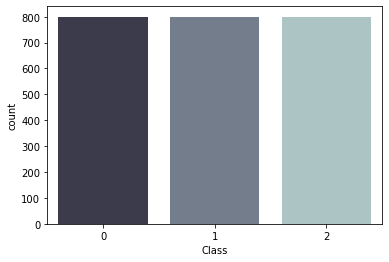

In [26]:
sns.countplot(x=target, data=subject, palette="bone")
plt.show()

In [27]:
list_cor = pd.DataFrame(subject[features].corr().unstack().abs().sort_values().drop_duplicates())
list_cor.columns = ['correlation_index']
list_corr_high = list(list_cor[-33:-1]['correlation_index'].index)
list_corr_high

[('AF4 theta m', 'AF4 delta m'),
 ('F8 theta std', 'FC6 theta std'),
 ('O2 beta m', 'O2 alpha m'),
 ('FC6 theta m', 'FC6 delta m'),
 ('F4 delta m', 'F4 delta std'),
 ('P8 delta std', 'P8 delta m'),
 ('AF4 theta std', 'AF4 theta m'),
 ('FC6 theta m', 'AF4 delta m'),
 ('AF3 theta std', 'AF3 theta m'),
 ('F7 delta m', 'AF4 delta m'),
 ('F8 theta m', 'F8 theta std'),
 ('P8 beta m', 'P8 beta std'),
 ('F3 delta m', 'F3 delta std'),
 ('F8 theta m', 'AF4 theta m'),
 ('P7 delta std', 'P7 delta m'),
 ('F3 beta m', 'F3 beta std'),
 ('P8 beta m', 'P8 alpha m'),
 ('T7 beta m', 'T7 beta std'),
 ('AF4 delta m', 'FC6 delta m'),
 ('T7 delta std', 'T7 delta m'),
 ('FC6 theta std', 'FC6 theta m'),
 ('FC6 theta m', 'AF4 theta m'),
 ('P8 theta m', 'P8 beta m'),
 ('F8 theta m', 'FC6 theta m'),
 ('T8 beta std', 'T8 beta m'),
 ('T8 delta m', 'T8 delta std'),
 ('P8 alpha m', 'P8 theta m'),
 ('FC5 delta m', 'FC5 delta std'),
 ('O2 delta std', 'O2 delta m'),
 ('O2 beta m', 'O2 beta std'),
 ('FC5 beta std', 'FC5 

In [45]:
from sklearn.preprocessing import MinMaxScaler

subject.sort_index(ascending=False).reset_index(drop=True)

scaler = MinMaxScaler()
scale_cols = ['Class','AF4 theta m', 'AF4 delta m',
 'F8 theta std', 'FC6 theta std',
 'O2 beta m', 'O2 alpha m',
 'FC6 theta m', 'FC6 delta m',
 'F4 delta m', 'F4 delta std',
 'P8 delta std', 'P8 delta m',
 'AF4 theta std', 'AF4 theta m',
 'FC6 theta m', 'AF4 delta m',
 'AF3 theta std', 'AF3 theta m',
 'F7 delta m', 'AF4 delta m',
 'F8 theta m', 'F8 theta std',
 'P8 beta m', 'P8 beta std',
 'F3 delta m', 'F3 delta std',
 'F8 theta m', 'AF4 theta m',
 'P7 delta std', 'P7 delta m',
 'F3 beta m', 'F3 beta std',
 'P8 beta m', 'P8 alpha m',
 'T7 beta m', 'T7 beta std',
 'AF4 delta m', 'FC6 delta m',
 'T7 delta std', 'T7 delta m',
 'FC6 theta std', 'FC6 theta m',
 'FC6 theta m', 'AF4 theta m',
 'P8 theta m', 'P8 beta m',
 'F8 theta m', 'FC6 theta m',
 'T8 beta std', 'T8 beta m',
 'T8 delta m', 'T8 delta std',
 'P8 alpha m', 'P8 theta m',
 'FC5 delta m', 'FC5 delta std',
 'O2 delta std', 'O2 delta m',
 'O2 beta m', 'O2 beta std',
 'FC5 beta std', 'FC5 beta m',
'F8 delta std', 'F8 delta_m]
subject_scaled = scaler.fit_transform(subject[scale_cols])
subject_scaled = pd.DataFrame(subject_scaled)
subject_scaled.columns = scale_cols

subject_scaled

,Class,AF4 theta m,AF4 delta m,F8 theta std,FC6 theta std,O2 beta m,O2 alpha m,FC6 theta m,FC6 delta m,F4 delta m,...,FC5 delta m,FC5 delta std,O2 delta std,O2 delta m,O2 beta m,O2 beta std,FC5 beta std,FC5 beta m,F8 delta std,F8 delta_m
0,0.5,0.078095,0.069068,0.040224,0.032465,0.055808,0.125131,0.075224,0.087190,0.425773,...,0.523930,0.673622,0.310593,0.299006,0.055808,0.119317,0.498206,0.614842,1.000000,1.000000
1,0.5,0.076620,0.077948,0.026521,0.071321,0.075505,0.098483,0.059832,0.066408,0.420697,...,0.520776,0.635227,0.328080,0.324061,0.075505,0.106101,0.820627,0.710945,0.986579,0.985151
2,0.5,0.055471,0.070068,0.017543,0.024881,0.124164,0.061528,0.051845,0.063438,0.422647,...,0.515993,0.624316,0.323599,0.323676,0.124164,0.103626,0.626142,0.739649,0.968853,0.965092
3,0.5,0.062630,0.061353,0.055919,0.011614,0.141683,0.102326,0.074680,0.075791,0.421721,...,0.519260,0.634242,0.291695,0.288100,0.141683,0.153724,0.665004,0.604725,0.953463,0.940463
4,0.5,0.085207,0.066941,0.058860,0.043310,0.136414,0.179567,0.082454,0.085775,0.398745,...,0.518324,0.631694,0.245292,0.264784,0.136414,0.122339,0.650434,0.676068,0.938450,0.926446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,0.0,0.047983,0.090724,0.037780,0.066175,0.141754,0.156581,0.062010,0.107234,0.497146,...,0.596673,0.775430,0.238531,0.209498,0.141754,0.118384,0.130719,0.193524,0.436928,0.381816
2396,0.0,0.039714,0.089042,0.097876,0.089762,0.095865,0.190453,0.071788,0.099779,0.499512,...,0.597920,0.774896,0.246946,0.202928,0.095865,0.033114,0.106864,0.200122,0.446938,0.389199
2397,0.0,0.062274,0.095050,0.078587,0.084693,0.078102,0.178505,0.072575,0.091561,0.482514,...,0.595607,0.727977,0.234698,0.213487,0.078102,0.051671,0.158753,0.153825,0.458497,0.395214
2398,0.0,0.034988,0.090861,0.054558,0.091653,0.072683,0.127091,0.087261,0.095544,0.462705,...,0.567643,0.690452,0.241174,0.230064,0.072683,0.066483,0.084374,0.091757,0.449737,0.396693


In [47]:
TEST_SIZE = 2
WINDOW_SIZE = 10

train = subject_scaled[:-TEST_SIZE]
test = subject_scaled[-TEST_SIZE:]

In [48]:
def make_dataset(data, label, window_size=10):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)